In [1]:
%matplotlib inline

import os
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import pylab 
import scipy.stats as stats
import itertools
import math

In [6]:
def load_file():
    if not os.path.isfile("combined.csv"):
        df1 = pd.read_csv("exp1.txt")
        df2 = pd.read_csv("exp2.txt")
        df3 = pd.read_csv("exp3.txt")
        df4 = pd.read_csv("exp4.txt")
        df1.columns = ["count", "overhead1"]
        df2.columns = ["count", "overhead2"]
        df3.columns = ["count", "overhead3"]
        df4.columns = ["count", "overhead4"]
        df = pd.concat([df1, df2["overhead2"], df3["overhead3"], df4["overhead4"]], axis=1)
        df.to_csv(path_or_buf="combined.csv", index= False)
        del df1, df2, df3, df4
    else:
        df = pd.read_csv("combined.csv")
    return df
df = load_file()

In [7]:
df.head()

,count,overhead1,overhead2,overhead3,overhead4
0,1,3.728859,1.082015,2.207685,4.435842
1,2,3.075765,1.540377,1.233359,1.521918
2,3,1.531744,4.082080,1.432632,1.722991
3,4,1.270471,1.838550,1.447168,1.241221
4,5,1.173743,2.797368,1.701179,2.548723


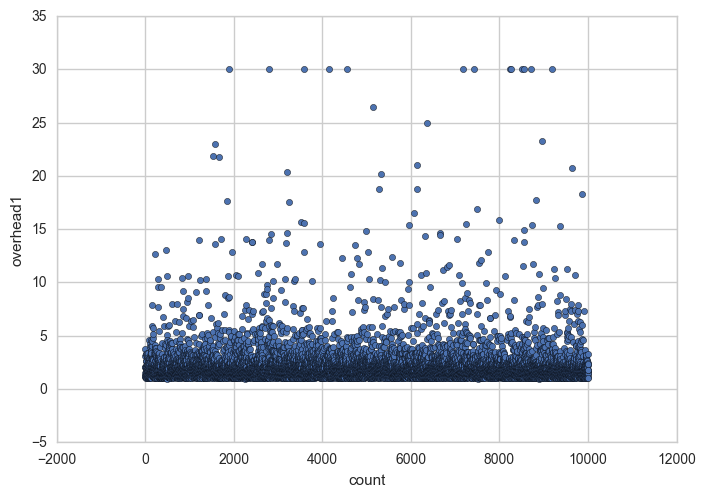

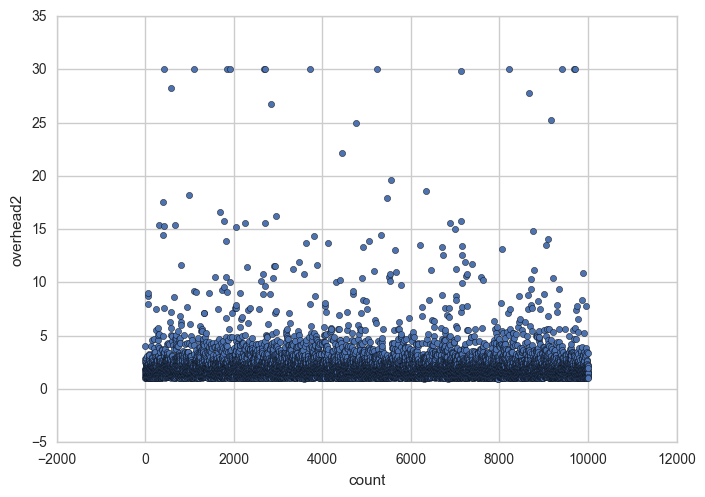

In [8]:
df.plot(kind='scatter',x='count',y='overhead1')
df.plot(kind='scatter',x='count',y='overhead2')

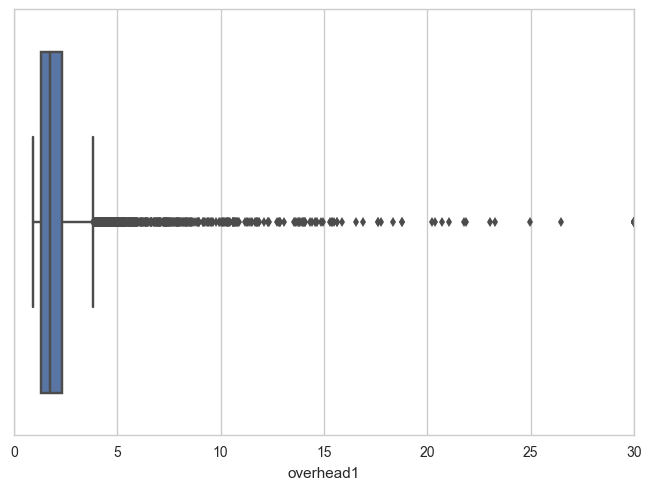

In [8]:
ax = sns.boxplot(x="overhead1", data= df)

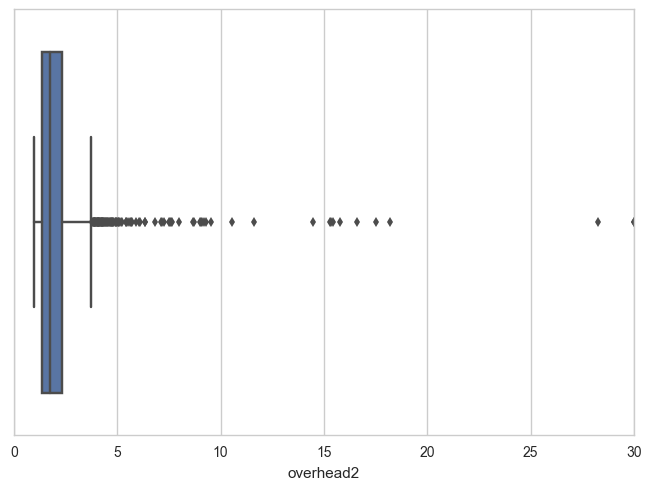

In [9]:
ax = sns.boxplot(x="overhead2", data= df)

### Analysis of Distribution of Overhead Data
Distribution of `log(data)` and `gamma` distribution seems quite similar 

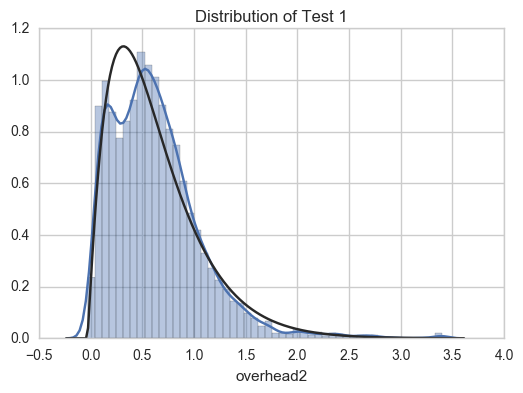

In [29]:
data = df["overhead1"]
ax = plt.axes()
sns.distplot(np.log(data), fit=stats.gamma , ax=ax)
ax.set_title("Distribution of Test 1")

In [30]:
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(np.log(data))
print fit_alpha, fit_loc, fit_beta

2.13140690969 -0.0330971261019 0.30871629649


((array([-0.02800275, -0.02535301, -0.02343935, ...,  3.35411904,
          3.51279606,  3.81271542]),
  array([-0.09658487, -0.02665692, -0.0120411 , ...,  3.40119738,
          3.40119738,  3.40119738])),
 (1.0453735539058739, -0.019383790424039038, 0.9973820829729364))

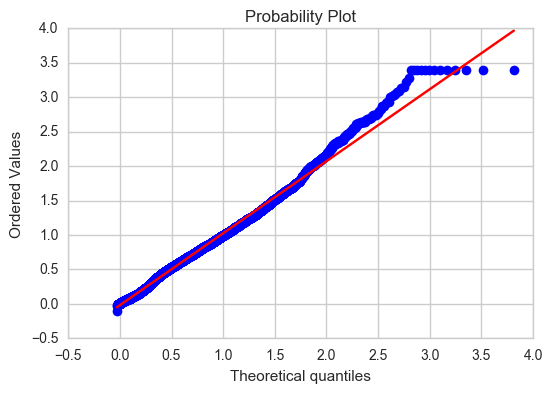

In [32]:
stats.probplot(np.log(df["overhead1"]), dist=stats.gamma,sparams=(fit_alpha, fit_loc, fit_beta), plot=plt)

It is clear to say that data is not normally distributed since it is only positive and really skewed 

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([  0.9721357 ,   0.98107909,   0.98210666, ...,  30.        ,
          30.        ,  30.        ])),
 (1.1847096874463563, 2.131390998235827, 0.65865765416366429))

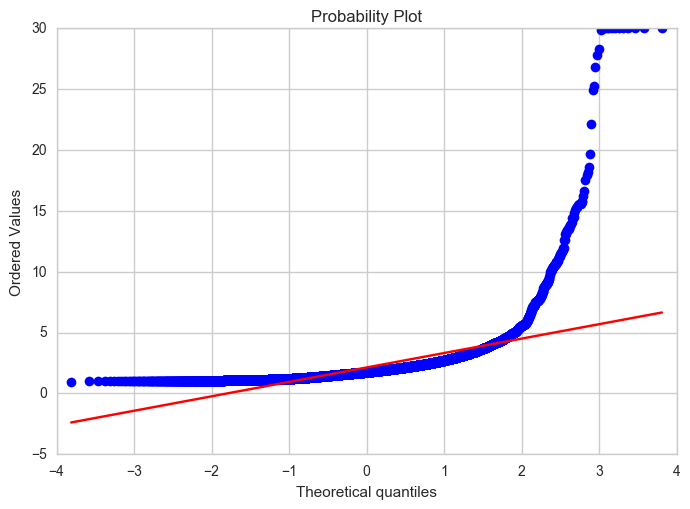

In [10]:
stats.probplot(df["overhead2"], dist="norm", plot=plt)

In [58]:
overhead1 = np.asarray(df["overhead1"])
overhead2 = np.asarray(df["overhead2"])

In [59]:
np.var(overhead1), np.var(overhead2)

(1.0721372537879432, 1.1026319390965296)

In [60]:
np.mean(overhead1), np.mean(overhead2)

(2.0036884947202687, 2.0265771103204275)